### АРТЕМ - блок с базой данных

In [ ]:
import re
import pandas as pd
import numpy as np
import psycopg2
from getpass import getpass
from sqlalchemy import create_engine

In [2]:
"""
Данный код считывает файл Excel и подготавливает его к дальнейшей обработке
"""

# Путь к Excel файлу
excel_file_path = '/Users/artemkhilalov/Downloads/PQM.xlsx'

# чтение файла Excel и сохранение его в файловом объекте Excel
data_xls = pd.ExcelFile(excel_file_path)

In [3]:
"""
Позволяет извлечь названия листов из файла Excel, используя объект "ExcelFile"
"""
# Получение доступа к именам листов из объекта файла Excel
data_xls.sheet_names

['Table1 (basic)',
 'Table2 (limits)',
 'Table3 (events)',
 'Table4 (alloys)',
 'Table5 (temps)',
 'Table6 (weights)',
 'Table7 (head)',
 'Table8 (scrap)',
 'Table9 (all. scr.)',
 'Table10 (unall. scr.)']

In [4]:
"""
Этот код перебирает каждый лист в файле Excel (`data_xls`), извлекает желаемое имя из названия листа, анализирует данные с этого листа и сохраняет их в массиве
"""

"""
1. Инициализируется пустой словарь под названием "data" для хранения проанализированных данных с каждого листа.
2. Код выполняет итерацию по каждому имени листа в списке имен листов, полученном из `data_xls.sheet_names`.
3. Используя регулярные выражения, желаемое имя извлекается из названия листа. Круглые скобки удаляются, точки заменяются пустой строкой, а пробелы заменяются символами подчеркивания.
4. Данные из текущего листа анализируются с использованием метода `parse` объекта `ExcelFile` (`data_xls`). Параметру `header` присвоено значение `1`, указывающее на то, что заголовок расположен в первой строке.
5. Проанализированные данные сохраняются в словаре `data`, используя извлеченное имя в качестве ключа.
6. Выводится сообщение с указанием исходного названия листа и соответствующего названия, используемого в словаре.
"""
# Инициализирование пустого словаря для хранения проанализированных данных с каждого листа
data = {}

# Выполнение итерации по каждому названию листа в списке названий листов
for sheet_name in data_xls.sheet_names:
    # Извлечение желаемых Имен из названия листа, используя регулярные выражения
    # Удаление всех круглых скобок, точек и замена пробелов символами подчеркивания
    name = re.search(r'\((.+)\)', sheet_name).group(1).replace('.', '').replace(' ', '_')

    # Анализ данных с текущего листа, используя файловый объект Excel
    # Указание на то, что заголовок расположен в первой строке (header=1)
    parsed_data = data_xls.parse(sheet_name, header=1)

    # Сохранение проанализированных данных в словаре, используя извлеченное имя в качестве ключа
    data[name] = parsed_data

    # Вывод сообщения с указанием названия листа и соответствующего названия, используемого в словаре
    print(f"{sheet_name} saved as '{name}'")


Table1 (basic) saved as 'basic'
Table2 (limits) saved as 'limits'
Table3 (events) saved as 'events'
Table4 (alloys) saved as 'alloys'
Table5 (temps) saved as 'temps'
Table6 (weights) saved as 'weights'
Table7 (head) saved as 'head'
Table8 (scrap) saved as 'scrap'
Table9 (all. scr.) saved as 'all_scr'
Table10 (unall. scr.) saved as 'unall_scr'


In [5]:
# Access the 'limits' key in the 'data' dictionary and retrieve the corresponding DataFrame
# Use the 'head' method to get the first 3 rows of the DataFrame
data['limits'].head(3)


,HeatNo,Date,QualityRequirement,QualNo,CustID,CustVer,InternalVer,MetalRavneQualityName,SteelGroup,Month,...,Mo_UpperLimit,Mo_Final,V_LowerLimit,V_Target,V_UpperLimit,V_Final,W_LowerLimit,W_Target,W_UpperLimit,W_Final
0,71601,2003-08-26 21:12:07,834.99.1 / 2,834,99,1,2,OCR12VM,Tool Steel; High Alloyed; 4 Cold,8,...,0.9,0.77,0.75,0.8,0.9,0.75,0,0,0.2,0.20
1,71602,2003-08-26 23:59:05,834.99.1 / 2,834,99,1,2,OCR12VM,Tool Steel; High Alloyed; 4 Cold,8,...,0.9,0.81,0.75,0.8,0.9,0.80,0,0,0.2,0.04
2,71609,2003-08-27 22:46:45,834.99.1 / 2,834,99,1,2,OCR12VM,Tool Steel; High Alloyed; 4 Cold,8,...,0.9,0.83,0.75,0.8,0.9,0.82,0,0,0.2,0.10


In [6]:
# Извлечение ключей из словаря "data"
data.keys()

dict_keys(['basic', 'limits', 'events', 'alloys', 'temps', 'weights', 'head', 'scrap', 'all_scr', 'unall_scr'])

In [7]:
# Получение доступа к ключу "events" в словаре "data" и извлечение соответствующих фрейм данных
# Использование метода 'head', для получения первых 3 строк DataFrame
data['events'].head(5)

,EventID,LFVDHeatID,EventNo,EventGroupNo,EventStart,EventText,HeatNo
0,157924,516,1400,5,2003-08-26,"Added [35] FeMo = 180,0 kg",71601
1,157925,516,1400,5,2003-08-26,"Added [48] FeV = 450,0 kg",71601
2,157926,516,1400,5,2003-08-26,"Added [33] FeMnC = 70,0 kg",71601
3,157927,516,1400,5,2003-08-26,"Added [41] FeSi = 150,0 kg",71601
4,157928,516,1400,5,2003-08-26,"Added [13] CaO = 300,0 kg",71601


In [8]:
"""
Эта функция предназначена для извлечения названия сплава из заданной строки на основе шаблона 'Added\s*\[\d+\]\s*([^=]*)'
"""

"""
1. Функция с именем 'find_alloy_name' определяется с помощью единственного параметра 'string'.
2. Внутри функции выполняется поиск по регулярному выражению для 'string'.
3. Шаблон регулярного выражения "Added\s*\[\d+\]\s*([^=]*)" используется для поиска определенного шаблона в "строке".
- "Added" представляет собой конкретное ключевое слово.
- '\s*' соответствует нулю или более пробельным символам.
- '\[\d+\]' соответствует последовательности из одной или нескольких цифр, заключенных в квадратные скобки.
- '\s*' соответствует нулю или более пробельным символам.
- '([^=]*)' фиксирует любые символы, которые не являются знаком равенства '='.
4. Результат поиска сохраняется в переменной 'search_res'.
5. Если найдено совпадение (т.е. 'search_res' не равно None), захваченная группа (название сплава) возвращается после удаления всех начальных или конечных пробелов с помощью метода 'strip()'.
6. Если совпадение не найдено (т.е. 'search_res' равно None), возвращается np.nan (значение из библиотеки NumPy, указывающее на отсутствующие или неопределенные данные).
"""
# Определение функции с именем 'имя сплава - find_alloy_name', которая принимает 'string' в качестве входных данных
def find_alloy_name(string):
    # Нахождение шаблона в "string", используя регулярное выражение
    search_res = re.search(r'Added\s*\[\d+\]\s*([^=]*)', string)

    # Если находится совпадение, вохвращается захваченная группуа (название сплава) после удаления всех начальных или конечных пробелов
    # В противном случае возвращается np.nan (значение, указывающее на отсутствующие или неопределенные данные)
    return search_res.group(1).strip() if search_res else np.nan


In [9]:
"""
Эта функция предназначена для извлечения веса сплава из заданной строки на основе строки шаблона 'Added [^=]*=\s*(-?[\d+,]+)'
"""

# Определение функцию с именем 'вес сплава - find_alloy_weight', которая принимает 'string' в качестве входных данных
def find_alloy_weight(string):
    # Нахождение шаблона в "string", используя регулярное выражение
    search_res = re.search(r'Added [^=]*=\s*(-?[\d+,]+)', string)

    # Если найдено совпадение, вохвращается захваченная группу (вес сплава) после замены запятых точками и преобразования ее в значение с плавающей точкой
    # В противном случае верните np.nan (значение, указывающее на отсутствующие или неопределенные данные)
    return float(search_res.group(1).replace(',', '.')) if search_res else np.nan


In [10]:
"""
Эти строки кода добавляют два новых столбца во фрейм данных 'events', извлекая информацию из столбца 'EventText' с помощью функций 'find_alloy_name' и 'find_alloy_weight'.
"""

"""
1. Новый столбец с именем 'NameOfAddedAlloy' добавляется во фрейм данных 'events' с помощью оператора индексации (`[]`).
2. Значения в этом новом столбце получены путем применения функции 'find_alloy_name' к столбцу 'EventText' фрейма данных 'events'.
3. Метод 'apply()' используется в столбце 'EventText', который применяет функцию 'find_alloy_name' к каждому элементу столбца.
4. Результат применения функции присваивается в виде значений столбца 'NameOfAddedAlloy'.
"""
data['events']['NameOfAddedAlloy'] = data['events']['EventText'].apply(find_alloy_name)

"""
1. Новый столбец с именем 'WeightOfAddedAlloy' добавляется во фрейм данных 'events' с помощью оператора индексации (`[]`).
2. Значения в этом новом столбце получены путем применения функции 'find_alloy_weight' к столбцу 'EventText' фрейма данных 'events'.
3. Метод 'apply()' используется в столбце 'EventText', который применяет функцию 'find_alloy_weight' к каждому элементу столбца.
4. Результат применения функции присваивается в виде значений столбца 'WeightOfAddedAlloy'.
"""
data['events']['WeightOfAddedAlloy'] = data['events']['EventText'].apply(find_alloy_weight)


In [11]:
# Display the first 3 rows of the 'events' DataFrame
data['events'].head(3)


,EventID,LFVDHeatID,EventNo,EventGroupNo,EventStart,EventText,HeatNo,NameOfAddedAlloy,WeightOfAddedAlloy
0,157924,516,1400,5,2003-08-26,"Added [35] FeMo = 180,0 kg",71601,FeMo,180.0
1,157925,516,1400,5,2003-08-26,"Added [48] FeV = 450,0 kg",71601,FeV,450.0
2,157926,516,1400,5,2003-08-26,"Added [33] FeMnC = 70,0 kg",71601,FeMnC,70.0


In [12]:
"""
В этом фрагменте кода функция `pivot_table()` из библиотеки Pandas используется для поворота и агрегирования данных из фрейма данных 'events'. Результирующая сводная таблица сохраняется в новом фрейме данных под названием 'group_events'.

Функция `pivot_table()` принимает несколько аргументов:
- `data['events']`: исходный фрейм данных, содержащий данные.
- `index=['HeatNo', 'EventID']`: Столбцы, используемые в качестве индекса для сводной таблицы.
- `columns='NameOfAddedAlloy": столбец в исходном фрейме данных, используемый для создания столбцов в сводной таблице.
- `values='WeightOfAddedAlloy": столбец в исходном фрейме данных, используемый для заполнения значений в сводной таблице.

После создания сводной таблицы вызывается метод `.reset_index()` для сброса индекса фрейма данных.

Затем метод `groupby()` используется для группировки данных по столбцу 'HeatNo', а метод `.sum()` применяется для выполнения суммирования по каждой группе. Этот шаг агрегирует значения для каждого 'HeatNo', в результате чего получается конечный фрейм данных 'group_events'.
"""
# Создание нового DataFrame 'group_events' путем поворота и агрегирования данных из фрейма данных 'events'
data['group_events'] = (
        pd.pivot_table(
            data['events'],  # Источник DataFrame
            index=['HeatNo', 'EventID'],  # Столбцы, используемые в качестве индекса
            columns='NameOfAddedAlloy',  # Столбец, используемый для создания столбцов в новом DataFrame
            values='WeightOfAddedAlloy'  # Значения, используемые для заполнения нового DataFrame
        ).reset_index()  # Сброс индекса сводной таблицы
    .groupby('HeatNo', as_index=False)  # Группировка данные по "HeatNo"
    .sum()  # Выполнение суммирования по каждой группе
)


In [13]:
data['group_events']

NameOfAddedAlloy,HeatNo,EventID,Al bloki,Al gran,Al opl.zica,Al zica,BOKSIT,BOKSIT beli,Borax,CASIfi13,...,Mn met,Molyquick,Ni gran,Ni katode,POLYMOX,S žica,SINT. ŽLINDRA,SLAGMAG 65B,SiMn,karburit-kosi
0,71601,3158735,15.0,0.0,0.0,0.0,0.0,150.0,0.0,16.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
1,71602,3159423,20.0,0.0,0.0,0.0,0.0,50.0,0.0,16.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0
2,71609,2214743,20.0,0.0,0.0,0.0,0.0,70.0,0.0,16.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,71610,2373299,20.0,0.0,0.0,0.0,0.0,50.0,0.0,16.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0
4,71616,1742382,5.0,0.0,0.0,0.0,0.0,70.0,0.0,16.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,98222,20384738,5.0,10.0,0.0,0.0,160.0,0.0,0.0,14.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3574,98223,19186127,5.0,10.0,0.0,0.0,310.0,0.0,0.0,15.2,...,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3575,98244,28797728,13.0,0.0,0.0,0.0,480.0,0.0,0.0,14.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0
3576,98254,22805824,22.0,0.0,5.8,0.0,200.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
"""
Этот код определяет функцию под названием `rename_column`, которая принимает два параметра: `column` и `prefix`.

В этой функции:
- Строка `возвращает столбец, если столбец в ['HeatNo', 'EventID'] else ...` проверяет, является ли значение `column` либо 'HeatNo', либо 'EventID'. Если это так, то имя столбца возвращается без изменений.
- Если значение `column` не равно 'HeatNo' или 'EventID', код переходит к части строки `else`. Здесь название столбца изменяется путем добавления префикса и заглавной буквы в первой букве каждого слова. Это достигается путем разделения имени столбца с помощью метода `.split()`, итерации по результирующим словам, заглавной буквы в первой букве каждого слова с использованием индексации `s[0].upper()` и объединения измененных слов с подчеркиванием между ними с помощью '_'.join(...)`.

Цель этой функции - предоставить способ переименования столбцов во фрейме данных, где определенные столбцы, такие как 'HeatNo' и 'EventID', остаются неизменными, в то время как другие столбцы изменяются путем добавления префикса и заглавных букв в их первых буквах.
"""

def rename_column(column, prefix):
    # Если имя столбца 'Heat No' или 'EventID', остается без изменений
    # В противном случае меняется название столбца, добавив префикс и заглавные буквы в первой букве каждого слова
    return column if column in ['HeatNo', 'EventID'] else prefix + '_'.join([s[0].upper() + s[1:] for s in column.split()])


In [15]:
"""
Цель этого кода - переименовать столбцы фрейма данных 'group_events', применив функцию `rename_column()` к метке каждого столбца и используя возвращаемые значения в качестве меток новых столбцов. Префикс 'Added_' добавляется к меткам столбцов, за исключением столбцов с метками 'HeatNo' и 'EventID', которые остаются неизменными.
"""


"""
В этом коде:
- `data['group_events']` ссылается на фрейм данных с именем 'group_events'.
- `.columns` извлекает метки столбцов фрейма данных.
- Строка `... = [rename_column(column, 'Added_') for column in ...]` использует список для перебора меток каждого столбца в столбцах фрейма данных.
- Внутри списка функция `rename_column()` вызывается для каждой метки столбца, передавая метку столбца и префикс 'Added_' в качестве аргументов.
- Возвращаемое значение из `rename_column()` собирается в список, который станет новыми метками столбцов фрейма данных.
- Наконец, новый список меток столбцов присваивается обратно "data[`group_events'].columns", эффективно переименовывая столбцы фрейма данных.
"""

data['group_events'].columns = [rename_column(column, 'Added_') for column in data['group_events'].columns]
# Переименование столбцов фрейма данных 'group_events'
# Выполнение итераций по метке каждого столбца в столбцах DataFrame
# Вызов функции rename_column() для каждой метки столбца, передавая метку столбца и префикс 'Added_' в качестве аргументов
# Сборка возвращаемых значений из rename_column() в список, который станет новыми метками столбцов DataFrame
# Назначение нового списка меток столбцов обратно data['group_events'].columns, эффективно переименовав столбцы DataFrame


In [16]:
# Получение доступа к атрибуту columns DataFrame 'group_events'
data['group_events'].columns

Index(['HeatNo', 'EventID', 'Added_Al_Bloki', 'Added_Al_Gran',
       'Added_Al_Opl.zica', 'Added_Al_Zica', 'Added_BOKSIT',
       'Added_BOKSIT_Beli', 'Added_Borax', 'Added_CASIfi13', 'Added_CaO',
       'Added_CaSi', 'Added_Cfi13', 'Added_DUŠIK', 'Added_EPZ_Zlindra',
       'Added_EPŽ_Žlindra', 'Added_FeAl', 'Added_FeCrA', 'Added_FeCrC',
       'Added_FeCrC_Si', 'Added_FeCrC51', 'Added_FeCrCSi', 'Added_FeMnC',
       'Added_FeMo', 'Added_FeS', 'Added_FeSi', 'Added_FeV',
       'Added_FeV_Opl._Žica', 'Added_FeW72', 'Added_KARBORITmleti',
       'Added_Kalcijev_Karbid', 'Added_Mn_Met', 'Added_Molyquick',
       'Added_Ni_Gran', 'Added_Ni_Katode', 'Added_POLYMOX', 'Added_S_Žica',
       'Added_SINT._ŽLINDRA', 'Added_SLAGMAG_65B', 'Added_SiMn',
       'Added_Karburit-kosi'],
      dtype='object')

In [17]:
"""
Этот фрагмент кода выполняет следующие действия:
1. Он фильтрует строки фрейма данных "events", где значение HeatNo равно 72869.
2. Он выполняет итерацию по каждой строке, используя метод `itertuples()`, который возвращает именованное кортежное представление строки.
3. Для каждой строки он проверяет, присутствует ли строка 'FeMo' в столбце EventText.
4. Если найден 'FeMo', он выводит значение EventText этой строки.
"""

# Выполнение итераций по каждой строке во DataFrame "events", где значение Heat равно 72869
for row in data['events'].query("HeatNo == 72869").itertuples():
    # Проверка, присутствует ли строка 'FeMo' в столбце Event Text текущей строки
    if 'FeMo' in row.EventText:
        # Вывод EventText в строке
        print(row.EventText)


Added [35] FeMo =  250,0 kg
Added [35] FeMo = -200,0 kg
Added [35] FeMo =   40,0 kg


In [18]:
"""
Эта строка кода фильтрует фрейм данных "events" на основе условия. Он выбирает строки, в которых значение в столбце "WeightOfAddedAlloy < 0". Метод `query()` в pandas позволяет задавать условия, используя синтаксис запроса на основе строк.

Результатом этой строки кода является подмножество фрейма данных "события", которое содержит только строки, в которых вес добавленного сплава отрицательный.
"""

# Фильтрация DataFrame "events", используя условие запроса
data['events'].query("WeightOfAddedAlloy < 0")


,EventID,LFVDHeatID,EventNo,EventGroupNo,EventStart,EventText,HeatNo,NameOfAddedAlloy,WeightOfAddedAlloy
248,159600,572,1400,5,2003-09-23 08:18:40,"Added [15] CASIfi13 = -23,5 kg",71756,CASIfi13,-23.5
663,163488,696,1400,5,2003-10-14 03:27:00,"Added [30] FeCrC51 = -100,0 kg",71878,FeCrC51,-100.0
1518,170030,908,1400,5,2003-11-17 01:59:00,"Added [15] CASIfi13 = -16,5 kg",72093,CASIfi13,-16.5
2514,177255,1135,1400,5,2003-12-20 17:55:16,"Added [30] FeCrC51 = -150,0 kg",72319,FeCrC51,-150.0
3841,186617,1447,1400,5,2004-02-14 18:52:57,"Added [15] CASIfi13 = -23,5 kg",72627,CASIfi13,-23.5
...,...,...,...,...,...,...,...,...,...
112421,1124103,25152,1400,5,2014-03-18 09:32:00,"Added [27] FeCrC = -750,0 kg",96243,FeCrC,-750.0
115647,1145447,25706,1400,5,2014-05-30 14:21:43,"Added [13] CaO = -900,0 kg",96796,CaO,-900.0
117693,1157118,26011,1400,5,2014-07-10 07:02:36,"Added [27] FeCrC = -3100,0 kg",97101,FeCrC,-3100.0
117955,1157975,26033,1400,5,2014-07-12 07:25:00,"Added [56] Ni katode = -100,0 kg",97123,Ni katode,-100.0


In [19]:
data['scrap'].head(3)

,HeatNo,Fill#1_ScrapName,Fill#1_ScrapWeight,Fill#2_ScrapName,Fill#2_ScrapWeight,Fill#3_ScrapName,Fill#3_ScrapWeight,Fill#4_ScrapName,Fill#4_ScrapWeight,Fill#5_ScrapName,Fill#5_ScrapWeight,Fill#6_ScrapName,Fill#6_ScrapWeight
0,71601,E3,43700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71602,E3,42100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71609,OCR12VM,49000,E8,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
"""
1. Инициализирует пустой фрейм данных с именем 'pivot_scrap' в словаре 'data'.
2. Выполняет итерацию по диапазону чисел от 1 до 6.
3. Для каждого числа создайте фрейм данных сводной таблицы, используя фрейм данных "scrap".
4. Сводная таблица строится с индексом, установленным на 'HeatNo', столбцами, установленными на 'Fill#<number>_ScrapName', и значениями, установленными на 'Fill#<number>_ScrapWeight'.
5. Сбрасывает индекс фрейма данных сводной таблицы.
6. Объединяет фрейм данных сводной таблицы с существующим фреймом данных 'pivot_scrap', используя `pd.concat()`.
7. Обновляет фрейм данных 'pivot_scrap' в словаре 'data' с помощью объединенного результата.

Результатом является фрейм данных, который объединяет сводные таблицы для каждого числа от 1 до 6, где каждая сводная таблица представляет данные об удалении для определенного номера заполнения.
"""

# Создание пустого DataFrame 'pivot_scrap'
data['pivot_scrap'] = pd.DataFrame()

# Выполнение итераций по диапазону чисел от 1 до 6 (включительно)
for number in range(1, 6 + 1):
    # Объединение DataFrame 'pivot_scrap' с новым DataFrame сводной таблицы
    data['pivot_scrap'] = pd.concat([
        data['pivot_scrap'],  # Существующий DataFrame 'pivot_scrap'
        pd.pivot_table(
            data['scrap'],  # 'scrap' DataFrame
            index='HeatNo',  # Индексный столбец сводной таблицы
            columns=f'Fill#{number}_ScrapName',  # Столбцы сводной таблицы
            values=f'Fill#{number}_ScrapWeight'  # Значения сводной таблицы
        ).reset_index()  # Сброс индекса DataFrame сводной таблицы
    ])

In [21]:
"""
1. Переименовывает столбцы фрейма данных 'pivot_scrap', повторяя имя каждого столбца и применяя функцию `rename_column`. Функция добавляет префикс 'Scrap_' к названию каждого столбца, за исключением 'HeatNo' и 'EventID'.
2. Группирует фрейм данных 'pivot_scrap' по столбцу 'HeatNo' и вычисляет сумму значений в каждой группе. Этот шаг агрегирует данные и объединяет строки с одинаковым значением "HeatNo".
3. Присваивает измененный фрейм данных 'pivot_scrap' обратно переменной 'pivot_scrap' в словаре 'data'.
4. Возвращает измененный фрейм данных 'pivot_scrap' в качестве выходных данных кода.

Результатом является преобразованный фрейм данных 'pivot_scrap', в котором столбцы были переименованы, а данные агрегированы на основе столбца 'HeatNo'.
"""

# Переименование столбца DataFrame 'pivot_scrap' с помощью пользовательской функции
data['pivot_scrap'].columns = [rename_column(column, 'Scrap_') for column in data['pivot_scrap'].columns]

# Группировка DataFrame 'pivot_scrap' по 'HeatNo' и суммирование значений
data['pivot_scrap'] = data['pivot_scrap'].groupby('HeatNo', as_index=False).sum()

# Возвращение измененных фрейм данных 'pivot_scrap'
data['pivot_scrap']


,HeatNo,Scrap_31CRV3,Scrap_CRV,Scrap_E3,Scrap_E6,Scrap_E8,Scrap_OCR12,Scrap_OCR12VM,Scrap_OCR12VM_OSTRUŽKI,Scrap_OH252,...,Scrap_OH255,Scrap_VCMO230,Scrap_EMCR,Scrap_OCR12SP,Scrap_OSIKRO3,Scrap_OSIKRO4,Scrap_PT929,Scrap_ECN150,Scrap_UTOP1,Scrap_UTOP2
0,71601,0.0,0.0,43700.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,71602,0.0,0.0,42100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71609,0.0,0.0,0.0,0.0,1300.0,0.0,49000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71610,0.0,0.0,0.0,16600.0,0.0,20000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71616,0.0,0.0,0.0,0.0,1500.0,0.0,50000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,98222,0.0,0.0,0.0,24000.0,0.0,0.0,15000.0,5000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3582,98223,0.0,0.0,0.0,24500.0,0.0,0.0,15000.0,5000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3583,98244,0.0,0.0,0.0,22000.0,0.0,0.0,15000.0,5000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3584,98254,0.0,0.0,0.0,24000.0,0.0,0.0,15000.0,5000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
"""
Этот фрагмент кода перебирает каждый ключ (имя таблицы) в словаре "data" и выводит информацию о каждой таблице. В нем содержатся:

- 'таблица': имя обрабатываемой таблицы.
- 'shape': количество строк в таблице, полученное путем обращения к атрибуту shape фрейма данных таблицы и выбора первого элемента (количество строк).
- 'uniqueHeatNo': количество уникальных значений в столбце 'HeatNo' таблицы, вычисляемое путем вызова функции nunique() в столбце 'HeatNo' фрейма данных таблицы.

Выводя эту информацию для каждой таблицы, можно понять размер и уникальность данных в каждой таблице, представленной в словаре "данные".
"""
# Выполнение итерации по каждому ключу (имени таблицы) в словаре "data"
for table in data.keys():
    # Выводв информации о таблице
    # - 'table': название таблицы
    # - 'shape': количество строк в таблице (shape[0])
    # - '# - 'уникальный HeatNo': количество уникальных значений в столбце "HeatNo" таблицы
    print(f'{table}: shape={data[table].shape[0]} uniqueHeatNo = {data[table].HeatNo.nunique()}')


basic: shape=3610 uniqueHeatNo = 3590
limits: shape=3606 uniqueHeatNo = 3590
events: shape=124605 uniqueHeatNo = 3582
alloys: shape=3582 uniqueHeatNo = 3582
temps: shape=3590 uniqueHeatNo = 3590
weights: shape=3590 uniqueHeatNo = 3590
head: shape=3590 uniqueHeatNo = 3590
scrap: shape=3588 uniqueHeatNo = 3588
all_scr: shape=3588 uniqueHeatNo = 3588
unall_scr: shape=3588 uniqueHeatNo = 3588
group_events: shape=3578 uniqueHeatNo = 3578
pivot_scrap: shape=3586 uniqueHeatNo = 3586


In [23]:
"""
Эти строки кода определяют два списка, `columns_for_basic` и `columns_for_limits`, которые определяют желаемые столбцы для таблиц 'basic' и 'limits' соответственно.

Для `columns_for_basic`:
- Он начинается со столбцов "HeatNo" и "Date" из таблицы "basic".
- Затем он включает в себя все столбцы из таблицы "basic", начиная со столбца "Month" и до конца столбцов.

Для `columns_for_limits`:
- Он начинается со столбцов "HeatNo" и "Date" из таблицы "limits".
- Затем он включает в себя все столбцы из таблицы "limits", начиная со столбца "Cr_LowerLimit" и до конца столбцов.

Создавая эти списки, он позволяет выбирать конкретные столбцы из таблиц "basic" и "limits", исключая ненужные столбцы и сохраняя только нужные для дальнейшей обработки или анализа.
"""


columns_for_basic = ['HeatNo', 'Date'] + list(data['basic'].columns[list(data['basic'].columns).index('Month'):])


columns_for_limits = ['HeatNo', 'Date'] + list(data['limits'].columns[list(data['limits'].columns).index('Cr_LowerLimit'):])


In [67]:
"""
Код выполняет серию слияний, чтобы объединить несколько таблиц в один фрейм данных под названием `res`.

1. Объедините таблицы "basic" и "limits".:
- Выбранные столбцы из таблицы 'basic' (указанные в `columns_for_basic`) объединяются с выбранными столбцами из таблицы 'limits' (указанные в `columns_for_limits`).
- Операция слияния выполняется с использованием левого соединения в общих столбцах 'HeatNo' и 'Date'.
- Результирующему фрейму данных присваивается значение `res`.

2. Объединяет дополнительные таблицы во фрейм данных `res`.:
- Код перебирает список имен таблиц: 'group_events', 'alloys', 'temps', 'weights', 'pivot_scrap', 'all_scr', 'unall_scr'.
- Для каждой таблицы выполняется слияние левого соединения между фреймом данных `res` и соответствующей таблицей из словаря `data`.
- Результирующему фрейму данных присваивается значение `res`.

Объединяя эти таблицы вместе, код объединяет данные из нескольких источников в единый фрейм данных, что позволяет проводить дальнейший анализ и обработку.
"""


res = data['basic'][columns_for_basic].merge(
    data['limits'][columns_for_limits], left_on=['HeatNo', 'Date'], right_on=['HeatNo', 'Date'], how='left')


for table in ['group_events', 'alloys', 'temps', 'weights', 'pivot_scrap', 'all_scr', 'unall_scr']:
    res = res.merge(data[table], how='left')


In [68]:
"""
Код выполняет следующие операции:

1. Удаляет строки с пропущенными значениями:
- Строки во фрейме данных `res` удаляются, если какой-либо из столбцов 'Cr_Last_EOP', 'Ni_Last_EOP', 'Mo_Last_EOP', 'V_Last_EOP' содержит пропущенные значения.
- Функция `dropna()` вызывается во фрейме данных 'res' с параметром `subset`, установленным для указанных столбцов.
- Параметру `inplace` присвоено значение `True`, чтобы изменить сам фрейм данных 'res'.

2. Выводит названия столбцов:
- Имена столбцов фрейма данных 'res' печатаются сегментами.
- В первой строке выводятся имена столбцов с индексом от 0 до 49.
- Во второй строке выводятся названия столбцов с индексом от 51 до 89.
- В третьей строке выводятся названия столбцов с индексом от 91 до 119.
- В четвертой строке выводятся названия столбцов с индексом от 121 до 189.

Эти операции помогают в анализе и проверке столбцов фрейма данных 'res' после удаления строк с пропущенными значениями. Напечатанные имена столбцов разделены на разные сегменты для облегчения чтения и понимания структуры фрейма данных.
"""

res.dropna(subset=['Cr_Last_EOP', 'Ni_Last_EOP', 'Mo_Last_EOP', 'V_Last_EOP'], inplace=True)

print(res.columns[:50])

print(res.columns[51:90])

print(res.columns[91:120])

print(res.columns[121:190])


Index(['HeatNo', 'Date', 'Month', 'Year', 'TotalIngotsWeight', 'PouringScrap',
       'OtherScrap', 'Last_EOP', 'Cr_Last_EOP', 'Cr_Final_x', 'LFVD_FeCrA',
       'LFVD_FeCrC', 'Ni_Last_EOP', 'Ni_Final_x', 'LFVD_NiGran',
       'LFVD_NiKatode', 'Mo_Last_EOP', 'Mo_Final_x', 'LFVD_FeMo',
       'LFVD_Polymox', 'V_Last_EOP', 'V_Final_x', 'LFVD_FeV', 'W_Last_EOP',
       'W_Final_x', 'LFVD_FeW72', 'LFVD_WPaketi', 'Cr_LowerLimit', 'Cr_Target',
       'Cr_UpperLimit', 'Cr_Final_y', 'Ni_LowerLimit', 'Ni_Target',
       'Ni_UpperLimit', 'Ni_Final_y', 'Mo_LowerLimit', 'Mo_Target',
       'Mo_UpperLimit', 'Mo_Final_y', 'V_LowerLimit', 'V_Target',
       'V_UpperLimit', 'V_Final_y', 'W_LowerLimit', 'W_Target', 'W_UpperLimit',
       'W_Final_y', 'EventID', 'Added_Al_Bloki', 'Added_Al_Gran'],
      dtype='object')
Index(['Added_Al_Zica', 'Added_BOKSIT', 'Added_BOKSIT_Beli', 'Added_Borax',
       'Added_CASIfi13', 'Added_CaO', 'Added_CaSi', 'Added_Cfi13',
       'Added_DUŠIK', 'Added_EPZ_Zlindra', '

In [69]:
"""
Код выбирает определенные столбцы из фрейма данных 'res' и присваивает им переменную 'x'. Присвоив этим столбцам значение "x", они могут использоваться по отдельности или совместно для дальнейшего анализа или обработки.
"""
x = res[['TotalIngotsWeight', 'PouringScrap', 'OtherScrap', 'Cr_Last_EOP', 'Cr_Final_x',
          'Ni_Last_EOP', 'Ni_Final_x', 'Mo_Last_EOP', 'Mo_Final_x', 'V_Last_EOP', 'V_Final_x',
          'W_Last_EOP', 'W_Final_x', 'Scrap_31CRV3', 'Scrap_CRV', 'Scrap_E3', 'Scrap_E6',
          'Scrap_E8', 'Scrap_OCR12', 'Scrap_OCR12VM', 'Scrap_OCR12VM_OSTRUŽKI', 'Scrap_OH252',
          'Scrap_PK2', 'Scrap_PK5', 'Scrap_PK5M', 'Scrap_PT181', 'Scrap_UTOPMO2', 'Scrap_UTOPMO4',
          'Scrap_CRMO_OSTRUŽKI', 'Scrap_E40', 'Scrap_OH255', 'Scrap_VCMO230', 'Scrap_EMCR',
          'Scrap_OCR12SP', 'Scrap_OSIKRO3', 'Scrap_OSIKRO4', 'Scrap_PT929', 'Scrap_ECN150',
          'Scrap_UTOP1', 'Scrap_UTOP2', 'PV_MKK', 'PV_PO102', 'PV_OCR12SPW', 'PV_OCR8W',
          'PV_PO180', 'PV_PT181', 'PV_PT202', 'PV_PT212', 'PV_OH239', 'PV_OSIKRO3', 'PV_OW4',
          'PV_OCR8VMS', 'PV_CRV3', 'PV_OH250', 'PV_OH252', 'PV_OH255', 'PV_OH257', 'PV_OH258',
          'PV_OH260', 'PV_OH236NI', 'PV_UTOPMONI', 'PV_PKTB', 'PV_PK3NI', 'PV_PK332', 'PV_PK335',
          'PV_PK338', 'PV_PK340', 'PV_PK11S', 'PV_PK343', 'PV_18MNCR4', 'PV_PK346']]




In [70]:
"""
Код устанавливает значения для параметров подключения к базе данных, таких как хост, имя пользователя, пароль, имя базы данных и порт. Затем он создает движок, используя строку подключения к базе данных PostgreSQL. Наконец, он сохраняет фрейм данных 'res' в таблицу с именем 'pqm' в базе данных PostgreSQL, используя функцию to_sql. Параметр if_exists='replace' гарантирует, что если таблица с таким же именем уже существует, она будет заменена новыми данными.
"""

# Установка значений для подключения к базе данных
HOST = "localhost"
USER = "postgres"
PASSWORD = getpass()
DB_NAME = "project_SRT"
PORT = "5432"

In [71]:
# Создание движка, используя строку подключения к базе данных PostgreSQL
engine = create_engine(
    "postgresql+psycopg2://"
    + f"{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
)

In [72]:
# Сохранение фрейм данных 'res' в таблице с именем 'pqm' в базе данных PostgreSQL
# - if_exists='заменить' гарантирует, что если таблица с таким же именем уже существует, он будет заменен новыми данными
res.to_sql('pqm', engine, if_exists='replace')

41

In [73]:
"""
Код выполняет итерацию по каждой таблице в словаре data. Для каждой таблицы он проверяет, содержит ли таблица столбец с именем 'Cr_Final'. Если столбец существует, он выводит имя таблицы. Этот код может быть использован для определения того, какие таблицы в словаре данных содержат столбец "Cr_Final".
"""

# Дублирование столбцов в таблицах
# Выполнение итераций по каждой таблице в словаре "data"
for table in data:
    # Проверка, есть ли в таблице столбец с именем 'Cr_Final'
    if 'Cr_Final' in data[table].columns:
        # Если в таблице существует столбец 'Cr_Final', выводится название таблицы
        print(table)


basic
limits


In [74]:
res

,HeatNo,Date,Month,Year,TotalIngotsWeight,PouringScrap,OtherScrap,Last_EOP,Cr_Last_EOP,Cr_Final_x,...,PV_OCR12VM_OSTRUŽKI,PV_POSEBNA_JEKLA_OSTRUŽKI,PV_BRM2_OSTRUŽKI,PV_E1,PV_E3,PV_E6,PV_E8,PV_Kore,PV_GRODELJ,PV_E40
383,73579,2004-07-27 00:17:10,7,2004,49440.0,600.0,2000.0,2.0,9.7100,11.30,...,0.0,0.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0
384,73580,2004-07-27 02:18:07,7,2004,46800.0,1000.0,100.0,3.0,12.4100,11.75,...,0.0,0.0,0.0,0.0,40200.0,0.0,0.0,0.0,0.0,0.0
385,73581,2004-07-27 04:46:58,7,2004,45320.0,800.0,2000.0,3.0,11.2400,11.63,...,0.0,0.0,0.0,0.0,40200.0,0.0,0.0,0.0,0.0,0.0
386,73589,2004-07-28 03:42:29,7,2004,46800.0,1000.0,800.0,3.0,11.8700,11.60,...,0.0,0.0,0.0,0.0,40200.0,0.0,0.0,0.0,0.0,0.0
387,73590,2004-07-28 05:32:32,7,2004,48410.0,800.0,2000.0,2.0,10.0200,11.29,...,5000.0,0.0,0.0,0.0,0.0,15200.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,98222,2014-12-18 12:30:07,12,2014,47380.0,800.0,900.0,2.0,11.0977,11.42,...,5000.0,0.0,0.0,0.0,0.0,24000.0,0.0,0.0,0.0,0.0
3640,98223,2014-12-18 14:13:33,12,2014,47360.0,400.0,900.0,2.0,10.5393,11.30,...,5000.0,0.0,0.0,0.0,0.0,24500.0,0.0,0.0,0.0,0.0
3641,98244,2014-12-20 12:46:39,12,2014,44400.0,600.0,300.0,2.0,9.3272,12.07,...,5000.0,0.0,0.0,0.0,0.0,22000.0,0.0,0.0,0.0,0.0
3642,98254,2014-12-21 14:47:16,12,2014,48410.0,800.0,700.0,2.0,10.5762,11.29,...,5000.0,0.0,0.0,0.0,0.0,24000.0,0.0,0.0,0.0,0.0


### Брак

In [75]:
"""
Эта строка кода фильтрует строки в res фрейма данных на основе условия. Условие проверяет, является ли значение в столбце 'Ni_Final_x' меньше 'Ni_Lower Limit' или больше 'Ni_Upper Limit'. Строки, удовлетворяющие этому условию, будут возвращены в виде нового фрейма данных. Этот код может быть использован для идентификации и извлечения строк, в которых значения 'Ni_Final_x' выходят за указанные пределы.
"""

# Фильтрация строки во фрейме данных 'res' на основе условия
res.query("Ni_Final_x < Ni_LowerLimit or Ni_Final_x > Ni_UpperLimit")

,HeatNo,Date,Month,Year,TotalIngotsWeight,PouringScrap,OtherScrap,Last_EOP,Cr_Last_EOP,Cr_Final_x,...,PV_OCR12VM_OSTRUŽKI,PV_POSEBNA_JEKLA_OSTRUŽKI,PV_BRM2_OSTRUŽKI,PV_E1,PV_E3,PV_E6,PV_E8,PV_Kore,PV_GRODELJ,PV_E40
509,74449,2004-11-28 13:57:32,11,2004,45210.0,400.0,2000.0,2.0,10.99,11.35,...,5000.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0
557,74848,2005-02-03 04:21:39,2,2005,48410.0,800.0,800.0,2.0,10.16,11.28,...,7000.0,0.0,0.0,0.0,0.0,0.0,1500.0,0.0,0.0,0.0
602,75196,2005-03-22 23:28:21,3,2005,39140.0,800.0,0.0,2.0,10.46,11.37,...,7000.0,0.0,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0
663,75596,2005-05-15 17:08:10,5,2005,50400.0,800.0,3000.0,3.0,9.48,11.29,...,5000.0,0.0,0.0,0.0,0.0,17300.0,0.0,0.0,0.0,0.0
677,75688,2005-05-28 22:53:54,5,2005,45210.0,600.0,1300.0,2.0,10.76,11.34,...,5000.0,0.0,0.0,0.0,0.0,12700.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,97303,2014-08-22 07:03:02,8,2014,48520.0,800.0,2000.0,2.0,10.34,11.37,...,8000.0,0.0,0.0,0.0,0.0,18000.0,0.0,0.0,0.0,0.0
3481,97304,2014-08-22 09:21:03,8,2014,49440.0,800.0,2400.0,3.0,10.13,11.38,...,8000.0,0.0,0.0,0.0,0.0,18100.0,0.0,0.0,0.0,0.0
3489,97339,2014-08-27 10:31:49,8,2014,48000.0,800.0,700.0,2.0,11.58,11.61,...,8000.0,0.0,0.0,0.0,0.0,19200.0,0.0,0.0,0.0,0.0
3491,97399,2014-09-05 11:37:06,9,2014,48780.0,600.0,800.0,2.0,11.22,11.29,...,8000.0,0.0,0.0,0.0,0.0,10700.0,0.0,0.0,0.0,0.0


In [76]:
"""
Эта строка кода вычисляет процент строк в res фрейма данных, которые удовлетворяют условию, указанному в методе запроса. Он подсчитывает количество строк, в которых значения 'Ni_Final_x' либо меньше, чем 'Ni_LowerLimit', либо больше, чем 'Ni_UpperLimit'. Затем он делит это количество на общее количество строк в res и умножает его на 100, чтобы получить процент. Результирующий процент представляет собой долю строк, удовлетворяющих условию, по отношению к общему количеству строк в res. Это может быть полезно для анализа степени, в которой значения в столбце 'Ni_Final_x' отклоняются от заданных пределов.
"""

# Вычисление процента строк, удовлетворяющих условию
percentage = res.query("Ni_Final_x < Ni_LowerLimit or Ni_Final_x > Ni_UpperLimit").shape[0] / res.shape[0] * 100
print("#----------------------------------------------------------#")
print(f"| Процент строк, удовлетворящих условию: {percentage} |")
print("#----------------------------------------------------------#")

#----------------------------------------------------------#
| Процент строк, удовлетворящих условию: 2.196102690999072 |
#----------------------------------------------------------#


In [77]:
"""
Эта строка кода фильтрует res фрейма данных на основе условия, указанного в методе запроса. Он выбирает строки, в которых значения 'Ni_Final_x' либо меньше, чем 'Ni_LowerLimit', либо больше, чем 'Ni_UpperLimit'. Затем он вычисляет сумму столбца "TotalIngotsWeight" для этих отфильтрованных строк. Результирующая сумма представляет собой общий вес значений "TotalIngotsWeight", соответствующих строкам, удовлетворяющим условию. Это может быть полезно для понимания совокупного веса слитков, которые выходят за пределы указанных пределов для значений 'Ni_Final_x'.
"""

# Вычисление суммы общего веса слитков для строк, удовлетворяющих условию
sum_weight = res.query("Ni_Final_x < Ni_LowerLimit or Ni_Final_x > Ni_UpperLimit").TotalIngotsWeight.sum()
print("#------------------------------------------------------------#")
print(f"| Сумма TotalIngotsWeight, удовлетворящих условию: {sum_weight} |")
print("#------------------------------------------------------------#")

#------------------------------------------------------------#
| Сумма TotalIngotsWeight, удовлетворящих условию: 3323750.0 |
#------------------------------------------------------------#


In [78]:
"""
Этот код вычисляет процент дефектных строк и соответствующий общий вес для каждого элемента в списке ['Ni', 'Cr', 'Mo', 'W', 'V']. Он выполняет итерацию по каждому элементу и выполняет запросы к DataFrame 'res' для фильтрации строк на основе условия значения элемента 'Final_x'. Затем он вычисляет процентное соотношение этих отфильтрованных строк по сравнению с общим количеством строк в 'res' и суммой столбца 'TotalIngotsWeight' для этих отфильтрованных строк. Общий вес дефектных рядов накапливается в переменной "TotalIngotsWeight". Наконец, он выводит процент дефектных строк и соответствующий вес для каждого элемента.
"""

TotalIngotsWeightSum = 0
print("#----------------------------------#")
print("|        ИНФОРМАЦИЯ О БРАКЕ        |")
for elem in ['Ni', 'Cr', 'Mo', 'W', 'V']:
    # Выполнение итерации по каждому элементу в списке ['Ni', 'Cr', 'Mo', 'W', 'V']
    print("#----------------------------------#")
    print(f"| Металл: {elem}")

    # Запрос фрейм данных 'res', чтобы выбрать строки, в которых значение элемента 'Final_x' равно
    # либо меньше "LowerLimit" элемента, либо больше "UpperLimit" элемента.
    # Затем вычисляется процент таких строк по сравнению с общим количеством строк в 'res'.
    x = res.query(f"{elem}_Final_x < {elem}_LowerLimit or {elem}_Final_x > {elem}_UpperLimit").shape[0] / res.shape[0] * 100

    # Запрос фрейм данных 'res', чтобы выбрать строки, в которых значение элемента 'Final_x' равно
    # либо меньше "LowerLimit" элемента, либо больше "UpperLimit" элемента.
    # Затем вычисляется сумму столбца "TotalIngotsWeight" для этих отфильтрованных строк.
    y = res.query(f"{elem}_Final_x < {elem}_LowerLimit or {elem}_Final_x > {elem}_UpperLimit").TotalIngotsWeight.sum()

    # Add the calculated sum to the total sum of 'TotalIngotsWeight'.
    TotalIngotsWeightSum += y

    # Print the percentage of defective rows and the corresponding weight.
    print(f"| Процент брака: {x}")
    print(f"| Вес: {y}")
print("#----------------------------------#")

#----------------------------------#
|        ИНФОРМАЦИЯ О БРАКЕ        |
#----------------------------------#
| Металл: Ni
| Процент брака: 2.196102690999072
| Вес: 3323750.0
#----------------------------------#
| Металл: Cr
| Процент брака: 0.6186204763377668
| Вес: 932260.0
#----------------------------------#
| Металл: Mo
| Процент брака: 0.8042066192390969
| Вес: 1213615.0
#----------------------------------#
| Металл: W
| Процент брака: 0.9279307145066501
| Вес: 1414415.0
#----------------------------------#
| Металл: V
| Процент брака: 1.2372409526755337
| Вес: 1883365.0
#----------------------------------#


In [79]:
print("#----------------------------------#")
print(f"|  СУММАРНЫЙ ВЕС БРАКА: {TotalIngotsWeightSum}  |")
print("#----------------------------------#")

#----------------------------------#
|  СУММАРНЫЙ ВЕС БРАКА: 8767405.0  |
#----------------------------------#


In [80]:
"""
Этот код вычисляет годовую стоимость бракованного материала на основе накопленного общего веса бракованных строк ("TotalIngotsWeightSum"), количества лет между максимальной и минимальной датами в столбце "Date" фрейма данных ("res") и указанной цены за метрическую тонну. Сначала он вычисляет количество лет, затем делит общий вес на количество лет и преобразует его в метрические тонны. Затем он умножает эту сумму на цену за метрическую тонну, чтобы получить общую стоимость бракованного материала в год. И выводит рассчитанную общую стоимость.
"""

# Вычисление количества лет между максимальной и минимальной датой в столбце "Date" фрейма данных "res".
years = (res.Date.max() - res.Date.min()).days / 365

# Деление накопленных общих весов дефектных рядов ("TotalIngotsWeightSum") на количество лет ("years").
# и умножение на 1000, чтобы перевести вес из граммов в метрические тонны.
# При этом рассчитывается количество бракованного материала в метрических тоннах в год.
TotalIngotsWeightSum / years / 1000

# Установка цены за метрическую тонну бракованного материала равной 1000 долларам.
price = 1000

# Умножение количества бракованного материала в метрических тоннах в год на цену за метрическую тонну.
# При этом рассчитывается общая стоимость бракованного материала за год.
totalPrice = TotalIngotsWeightSum / years / 1000 * price

# Выведите общую стоимость бракованного материала за год, представленную в виде строки, объединенной с текстом " - цена брака за год".

print("#---------------------------------------#")
print(f"| ЦЕНА БРАКА ЗА ГОД: ${str(totalPrice)} |")
print("#---------------------------------------#")


#---------------------------------------#
| ЦЕНА БРАКА ЗА ГОД: $842353.9944722295 |
#---------------------------------------#


In [81]:
"""
Этот код вычисляет средневзвешенное отклонение конечных значений от целевых значений для каждого элемента. Он перебирает список элементов: 'Ni', 'Cr', 'Mo', 'W', 'V'. Для каждого элемента он вычисляет средний верхний предел путем вычитания целевого значения из конечного значения и создает новый столбец в DataFrame 'res' для хранения этих вычисленных значений. Затем он фильтрует фрейм данных, чтобы выбрать строки, где средний верхний предел больше 0, и вычисляет среднее значение столбца 'AvgUpperLimit' выбранных строк ('x'). Он также вычисляет процент строк, в которых средний верхний предел больше 0 ('y'). Он выводит среднее отклонение, процент и средневзвешенное отклонение.
"""


d = {}
# Создайте пустой словарь для хранения вычисленных значений для каждого элемента.

print("#------------------------------------------------------------------------#")
print("|        Cредневзвешенное отклонение конечных значений от целевых        |")


for elem in ['Ni', 'Cr', 'Mo', 'W', 'V']:
    # Выполните итерацию по списку элементов: 'Ni', 'Cr', 'Mo', 'W', 'V'.

    print("#------------------------------------------------------------------------#")
    print(f"| Металл: {elem}")
    # Выведите текущий элемент.

    res['AvgUpperLimit'] = res[f"{elem}_Final_x"] - res[f"{elem}_Target"]
    # Вычислите средний верхний предел, вычитая целевое значение из конечного значения текущего элемента.
    # Создайте новый столбец во фрейме данных 'res' для хранения этих вычисленных значений.

    x = res.query(f"AvgUpperLimit > 0").AvgUpperLimit.mean()
    # Отфильтруйте фрейм данных 'res', чтобы выбрать строки, в которых вычисленный средний верхний предел больше 0.
    # Вычислите среднее значение столбца "Средний верхний предел" выбранных строк.
    # Присвойте результат переменной 'x'.

    y = res.query(f"AvgUpperLimit > 0").shape[0] / res.shape[0]
    # Отфильтруйте фрейм данных 'res', чтобы выбрать строки, в которых вычисленный средний верхний предел больше 0.
    # Вычислите отношение количества выбранных строк к общему количеству строк в 'res'.
    # Присвойте результат переменной 'y'.

    print(f"| Среднее отклонение конечного значения от целевого: {x}")  # В процентах
    # Выведите среднее отклонение конечного значения от целевого для текущего элемента.
    # Это отклонение представлено в процентах.

    print(f"| Процент строк Final > Target: {y}")
    # Выведите процент строк, в которых рассчитанный средний верхний предел больше 0.


    print(f"| Среднее арифметическое взвешенное: {x * y}")
    # Умножьте среднее отклонение на процент, чтобы получить средневзвешенное отклонение.

    d[elem] = x * y
    # Присвоить средневзвешенное отклонение словарю 'd' с текущим элементом в качестве ключа.



print("#------------------------------------------------------------------------#")

#------------------------------------------------------------------------#
|        Cредневзвешенное отклонение конечных значений от целевых        |
#------------------------------------------------------------------------#
| Металл: Ni
| Среднее отклонение конечного значения от целевого: 0.179672131147541
| Процент строк Final > Target: 1.0
| Среднее арифметическое взвешенное: 0.179672131147541
#------------------------------------------------------------------------#
| Металл: Cr
| Среднее отклонение конечного значения от целевого: 0.08473053892215576
| Процент строк Final > Target: 0.4132384781936282
| Среднее арифметическое взвешенное: 0.03501391896071763
#------------------------------------------------------------------------#
| Металл: Mo
| Среднее отклонение конечного значения от целевого: 0.022858460119870926
| Процент строк Final > Target: 0.670893906588308
| Среднее арифметическое взвешенное: 0.01533560160841325
#-------------------------------------------------------------

In [82]:
"""
Этот код выполняет итерацию по списку элементов: 'Ni', 'Cr', 'Mo', 'W', 'V'. Для каждого элемента он фильтрует фрейм данных 'res', чтобы выбрать строки, в которых целевое значение для текущего элемента больше 0. Он вычисляет количество выбранных строк (количество строк, в которых определено целевое значение) и присваивает результат переменной 'x'. Он также добавляет значение 'y' к переменной 'TotalIngotsWeightSum'. И выводит процент строк, в которых целевое значение определено для текущего элемента.
"""

print("#----------------------------------------------#")
print("| Количетсво строк, в которых целевое значение |")
print("|       определено для текущего элемента       |")
for elem in ['Ni', 'Cr', 'Mo', 'W', 'V']:
    # Iterate over the list of elements: 'Ni', 'Cr', 'Mo', 'W', 'V'.

    print("#----------------------------------------------#")
    print(f"| Металл: {elem}")
    # Print the current element.

    x = res.query(f"{elem}_Target > 0").shape[0]
    # Отфильтруйте фрейм данных 'res', чтобы выбрать строки, в которых целевое значение для текущего элемента больше 0.
    # Вычислить количество выбранных строк (количество строк, в которых определено целевое значение).
    # Присвойте результат переменной 'x'.

    TotalIngotsWeightSum += y
    # Add the value of 'y' to the variable 'TotalIngotsWeightSum'.
    # Note: The variable 'y' is not defined in the provided code.

    print(f"| Количество строк > 0: {x}")
    # Выведите процент строк, в которых для текущего элемента определено целевое значение.


    # Print a separator line between iterations.

print("#----------------------------------------------#")

#----------------------------------------------#
| Количетсво строк, в которых целевое значение |
|       определено для текущего элемента       |
#----------------------------------------------#
| Металл: Ni
| Количество строк > 0: 0
#----------------------------------------------#
| Металл: Cr
| Количество строк > 0: 3233
#----------------------------------------------#
| Металл: Mo
| Количество строк > 0: 3233
#----------------------------------------------#
| Металл: W
| Количество строк > 0: 0
#----------------------------------------------#
| Металл: V
| Количество строк > 0: 3233
#----------------------------------------------#


In [83]:
"""
Этот код вычисляет и выводит сумму весов сплавов для каждого столбца, указанного в списке ['Added_FeCrA', 'Added_Facrc', 'Added_FeCrC_Si', 'Added_FeCrC51', 'Added_FeCrCSi']. Он выполняет итерацию по каждому столбцу, вычисляет сумму значений в этом столбце, делит ее на годы и преобразует в тонны. Промежуточные суммы добавляются к переменной 's'.
"""

s = 0
# Initialize a variable 's' to store the sum of alloy weights.

print("#-----------------------------------------#")
print("|               ВЕС СПЛАВОВ               |")
print("#-----------------------------------------#")

for column in ['Added_FeCrA', 'Added_FeCrC', 'Added_FeCrC_Si', 'Added_FeCrC51', 'Added_FeCrCSi']:
    # Iterate over the list of column names.

    print(f"| {column}: {res[column].sum()/years/1000} тонн")
    # Print the column name followed by the sum of values in that column divided by years and converted to tons.

    s += res[column].sum()/years/1000
    # Add the sum of values in the current column (converted to tons) to the variable 's'.

print("#-----------------------------------------#")
print(f"|        СУММА: {s}        |")
print("#-----------------------------------------#")



#-----------------------------------------#
|               ВЕС СПЛАВОВ               |
#-----------------------------------------#
| Added_FeCrA: 10.480563306133194 тонн
| Added_FeCrC: 222.9414043169255 тонн
| Added_FeCrC_Si: 8.394327454593315 тонн
| Added_FeCrC51: 4.0717820479073445 тонн
| Added_FeCrCSi: 0.07686233219268229 тонн
#-----------------------------------------#
|        СУММА: 245.96493945775205        |
#-----------------------------------------#


In [84]:
"""
Этот код вычисляет и выводит сумму весов сплавов для каждого столбца, указанного в списке ['Added_FeV', 'Added_FeMo']. Он выполняет итерацию по каждому столбцу, вычисляет сумму значений в этом столбце, делит ее на годы и преобразует в тонны. Промежуточные суммы добавляются к переменной 's'. Он также печатает заголовок, за которым следует название каждого столбца и соответствующая ему сумма весов в тоннах.
"""

s = 0
# Initialize a variable 's' to store the sum of alloy weights.
print("#-----------------------------------#")
print("|            ВЕС СПЛАВОВ            |")
print("#-----------------------------------#")
for column in [ 'Added_FeV', 'Added_FeMo']:
    print(f"| {column}: {res[column].sum()/years/1000}")
    s += res[column].sum()/years/1000
print("#-----------------------------------#")
print(f"|     СУММА: {s}     |")
print("#-----------------------------------#")

#-----------------------------------#
|            ВЕС СПЛАВОВ            |
#-----------------------------------#
| Added_FeV: 106.09317320347459
| Added_FeMo: 38.98130823901027
#-----------------------------------#
|     СУММА: 145.07448144248485     |
#-----------------------------------#


Прочие расчеты
- Этот блок включает в себя несколько вычислений, связанных с конкретными значениями и переменными.
- Он вычисляет количество партий в год с избытком, количество FeCr, потраченное на партии с избытком, сумму избытка и общую цену, потраченную впустую на FeCr.

In [110]:
print("Количество партий в год с избытком", 3644/years*0.41794731064763996)  # количество партий в год с избытком

print("Количество FeCr, потраченное на партии с избытком", 252/321*134) # потрачено FeCr в плавках с превышением в год  ------     количество FeCr, потраченное на партии с избытком
print("Сумма избытка", 252/321*134*0.08671043992120843) # превышение в год     ------ сумму избытка
priceCr = 350000 # рублей за тонну
print(f'Общая цена, потраченная впустую на FeCr {252/321*134*0.08671043992120843 * priceCr}')  #общую цену, потраченную впустую на FeCr

Количество партий в год с избытком 146.3266649118189
Количество FeCr, потраченное на партии с избытком 105.19626168224299
Сумма избытка 9.121614128533851
Общая цена, потраченная впустую на FeCr 3192564.944986848


In [111]:
print("Количество партий в год с избытком", 3644/years*0.41794731064763996)  # плавок в год с превышением

print("Количество FeCr, потраченное на партии с избытком", 45/321*134) # потрачено FeV в плавках с превышением в год
print("Сумма избытка", 252/321*134*0.08671043992120843) # превышение в год
priceMo = 1600000 # рублей за тонну
print(f'Общая цена, потраченная впустую на FeMo {252/321*134*0.08671043992120843 * priceMo}')

Количество партий в год с избытком 146.3266649118189
Количество FeCr, потраченное на партии с избытком 18.78504672897196
Сумма избытка 9.121614128533851
Общая цена, потраченная впустую на FeMo 14594582.605654161


In [112]:
print("Количество партий в год с избытком", 3644/years*0.41794731064763996)  # плавок в год с превышением

print("Количество FeCr, потраченное на партии с избытком", 111/321*134) # потрачено FeV в плавках с превышением в год
print("Сумма избытка", 252/321*134*0.08671043992120843) # превышение в год
priceV = 2100000 # рублей за тонну
print(f'Общая цена, потраченная впустую на FeV {252/321*134*0.08671043992120843 * priceV}')



Количество партий в год с избытком 146.3266649118189
Количество FeCr, потраченное на партии с избытком 46.336448598130836
Сумма избытка 9.121614128533851
Общая цена, потраченная впустую на FeV 19155389.66992109


In [113]:
print(f'${891420.815541264+(252/321*134*0.08671043992120843 * priceV+252/321*134*0.08671043992120843 * priceMo+252/321*134*0.08671043992120843 * priceCr)/78} в год')
#дз

$1365043.0875997525 в год


In [90]:
s * d['Cr'] / 10 / 1000 * 65000

33.01756988721944

In [91]:
d['Cr']

0.03501391896071763

In [109]:
res

,HeatNo,Date,Month,Year,TotalIngotsWeight,PouringScrap,OtherScrap,Last_EOP,Cr_Last_EOP,Cr_Final_x,...,PV_POSEBNA_JEKLA_OSTRUŽKI,PV_BRM2_OSTRUŽKI,PV_E1,PV_E3,PV_E6,PV_E8,PV_Kore,PV_GRODELJ,PV_E40,AvgUpperLimit
383,73579,2004-07-27 00:17:10,7,2004,49440.0,600.0,2000.0,2.0,9.7100,11.30,...,0.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,-0.03
384,73580,2004-07-27 02:18:07,7,2004,46800.0,1000.0,100.0,3.0,12.4100,11.75,...,0.0,0.0,0.0,40200.0,0.0,0.0,0.0,0.0,0.0,-0.66
385,73581,2004-07-27 04:46:58,7,2004,45320.0,800.0,2000.0,3.0,11.2400,11.63,...,0.0,0.0,0.0,40200.0,0.0,0.0,0.0,0.0,0.0,-0.04
386,73589,2004-07-28 03:42:29,7,2004,46800.0,1000.0,800.0,3.0,11.8700,11.60,...,0.0,0.0,0.0,40200.0,0.0,0.0,0.0,0.0,0.0,-0.03
387,73590,2004-07-28 05:32:32,7,2004,48410.0,800.0,2000.0,2.0,10.0200,11.29,...,0.0,0.0,0.0,0.0,15200.0,0.0,0.0,0.0,0.0,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,98222,2014-12-18 12:30:07,12,2014,47380.0,800.0,900.0,2.0,11.0977,11.42,...,0.0,0.0,0.0,0.0,24000.0,0.0,0.0,0.0,0.0,-0.01
3640,98223,2014-12-18 14:13:33,12,2014,47360.0,400.0,900.0,2.0,10.5393,11.30,...,0.0,0.0,0.0,0.0,24500.0,0.0,0.0,0.0,0.0,0.01
3641,98244,2014-12-20 12:46:39,12,2014,44400.0,600.0,300.0,2.0,9.3272,12.07,...,0.0,0.0,0.0,0.0,22000.0,0.0,0.0,0.0,0.0,0.00
3642,98254,2014-12-21 14:47:16,12,2014,48410.0,800.0,700.0,2.0,10.5762,11.29,...,0.0,0.0,0.0,0.0,24000.0,0.0,0.0,0.0,0.0,0.01


### Создание и обучение моделей

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
import psycopg2

# Установка соединения с базой данных
connection = psycopg2.connect(host="localhost", user="postgres", password = getpass(), dbname="project_SRT")

# Создание курсора
cursor = connection.cursor()

In [ ]:
"""
1. Импортируем модуль `pickle`.
2. Определяем словарь `metals_for_splav`, сопоставляющий аббревиатуры металлов с полными названиями.
3. Выполняем итерацию по металлам в словаре `metals_for_splav`.
4. Выполняем SQL-запрос для извлечения указанных столбцов из таблицы "данные".
5. Инициализируем пустые списки `x` и `y` для хранения функциональных и целевых данных.
6. Выполняем итерацию по полученным результатам и отфильтровывает строки с нулевыми значениями в указанных столбцах.
7. Инициализируем модель `RandomForestRegressor`.
8. Подгонка модели с использованием данных объекта (`x`) и цели (`y`).
9. Открываем файл для сохранения обученной модели с помощью `pickle`.
10. Загружаем обученную модель в файл.
11. Закрываем файл.
"""

import pickle

# Определите словарь, сопоставив названия металлов с соответствующими аббревиатурами
metals_for_splav = {
    "FeMo": "Mo",
    "FeV": "V",
    "FeCrC": "Cr",
}

# Итерация по металлам в словаре
for metal in metals_for_splav:
    # Выполните SQL-запрос для получения данных для текущего металла из таблицы "данные"
    cursor.execute(f'SELECT "{metal}" FROM "data"')
    res = cursor.fetchall()
    y = []

    # Извлеките значения металла из результата запроса и сохранит их в списке y
    for item in res:
        if item[0] == item[0]:
            y.append(item[0])

    # Выполните SQL-запрос, чтобы получить входные функции для текущего металла из таблицы "данные"
    cursor.execute(
        f'SELECT "TotalIngotsWeight", "{metals_for_splav[metal]}_Last_EOP", "{metals_for_splav[metal]}_Final_basic", "{metals_for_splav[metal]}_Final", ... FROM "data"')
    res = cursor.fetchall()

    x = []
    # Извлеките входные элементы из результата запроса и сохранит их в списке x
    for row in res:
        if (row[1] == row[1]) and (row[2] == row[2]):
            x.append(row)

    # Создание модели RandomForestRegressor с заданными параметрами
    regr = RandomForestRegressor(max_depth=13, random_state=0)

    # Разделите данные на учебные и тестовые наборы
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

    # Обучите модель, используя данные обучения
    regr.fit(X_train, y_train)

    # Делайте прогнозы по данным теста
    y_pred = regr.predict(X_test)

    # Сохраните обученную модель в файл с именем металла в качестве имени файла
    f = open(f'{metals_for_splav[metal]}_model.pkl', 'wb')
    pickle.dump(regr, f)


In [50]:
"""
1. Выполняем SQL-запрос для извлечения данных "FeMo" из таблицы "data".
2. Извлекаем результаты запроса и сохраняет их в переменной `res`.
3. Инициализируем пустой список `y` для хранения извлеченных значений.
4. Выполняем итерацию по полученным результатам и добавляет ненулевые значения в список `y`.
5. Выполняем SQL-запрос для извлечения входных характеристик для металла "Mo" из таблицы "данные".
6. Извлекаем результаты запроса и сохраняет их в переменной `res`.
7. Инициализируем пустой список `x` для хранения извлеченных входных элементов.
8. Выполняем итерацию по полученным результатам и добавляет строки с ненулевыми значениями в определенных столбцах в список `x`.
9. Создаем модель `RandomForestRegressor` с заданными параметрами.
10. Разбиваем данные на обучающие и тестовые наборы, используя функцию `train_test_split`.
11. Подгоняем модели с использованием обучающих данных.
"""

# Выполните SQL-запрос для получения данных "FeMo" из таблицы "данные"
cursor.execute('SELECT "FeMo" FROM "data"')
res = cursor.fetchall()
y = []

# Извлеките значения из результата запроса и сохранит их в списке y
for item in res:
    if (item[0] == item[0]):
        y.append(item[0])

# Выполните SQL-запрос, чтобы получить входные функции для металла "Mo" из таблицы "данные"
cursor.execute('SELECT "TotalIngotsWeight", "Mo_Last_EOP", "Mo_Final_basic", "Mo_Final", ... FROM "data"')
res = cursor.fetchall()

x = []
# Извлеките входные элементы из результата запроса и сохранит их в списке x
for row in res:
    if (row[1] == row[1]) and (row[2] == row[2]):
        x.append(row)

# Создание модели RandomForestRegressor с заданными параметрами
regr = RandomForestRegressor(max_depth=13, random_state=0)

# Разделите данные на учебные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Обучите модель, используя данные обучения
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=13, random_state=0)

In [52]:
"""
1. Используем обученную модель (`regr`) для прогнозирования значений тестовых данных (`X_test`).
2. Сохраняем прогнозируемые значения в переменной `y_pred`.
3. Вычисляем среднюю разницу между прогнозируемыми значениями (`y_pred`) и фактическими значениями (`y_test`).
4. Выводим результат, который представляет собой среднюю разницу между прогнозируемыми и фактическими значениями.

Код, по сути, оценивает среднюю разницу между прогнозируемыми значениями и фактическими значениями как меру производительности модели на основе тестовых данных.
"""

# Используем обученную модель для прогнозирования данных тестирования
y_pred = regr.predict(X_test)

# Вычислим среднюю разницу между прогнозируемыми значениями и фактическими значениями и распечатайте результат
print((y_pred - y_test).sum() / len(y_pred))


-1.2302723683026124


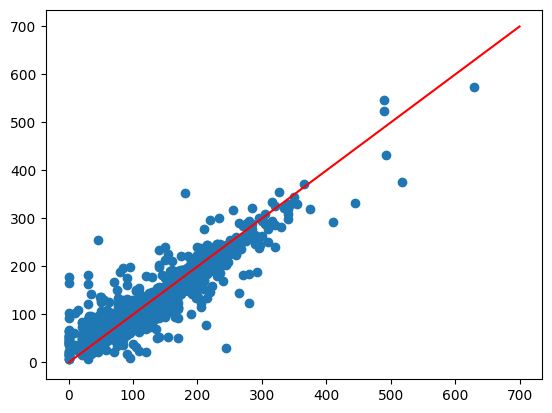

In [53]:
"""
1. Импортируем необходимый модуль `pyplot` из библиотеки `matplotlib`.
2. Создаем точечную диаграмму для визуализации взаимосвязи между фактическими значениями (`y_test`) и прогнозируемыми значениями (`y_pred`).
3. Точечная диаграмма показывает прогнозируемые значения по оси x и фактические значения по оси y, причем каждая точка представляет точку данных.
4. Добавляем красную линию к графику, представляющую идеальное соответствие между фактическими и прогнозируемыми значениями. В этом примере линия проводится от точки (0, 0) до (700, 700).

Код генерирует точечную диаграмму с красной линией, которая представляет идеальное соответствие между фактическими и прогнозируемыми значениями. Эта визуализация помогает оценить точность и производительность модели, изучая распределение точек данных вокруг идеальной линии.
"""

from matplotlib import pyplot as plt

# Создаем график рассеяния для визуализации взаимосвязи между фактическими значениями (y_test) и прогнозируемыми значениями (y_pred)
plt.scatter(y_test, y_pred)

# Добавляем красную линию, представляющую идеальное совпадение между фактическими и прогнозируемыми значениями
plt.plot([0, 700], [0, 700], color='red')


In [54]:
"""
1. Выполняем SQL-запрос для выбора столбца "FeV" из таблицы "данные".
2. Извлекаем все результаты из запроса и сохраняет их в переменной `res`.
3. Инициализируем пустой список `y` для хранения значений из результата запроса.
4. Повторяем каждый элемент в результате.
5. Проверяем, не равно ли значение элемента null, сравнивая его с самим собой.
6. Если значение не равно null, добавляем его к списку `y`.
7. Выполняем SQL-запрос для выбора нескольких столбцов из таблицы "данные".
8. Извлекаем все результаты из запроса и сохраняет их в переменной `res`.
9. Инициализируем пустой список `x` для хранения выбранных строк.
10. Выполняем итерацию по каждой строке в результате.
11. Проверяем, не являются ли значения во втором и третьем столбцах нулевыми, сравнивая их сами с собой.
12. Если оба значения не равны null, выводим строку (необязательно, для целей отладки).
13. Добавляем строку к списку `x`.

Код извлекает определенные значения столбцов из таблицы базы данных и сохраняет их в списке `y`. Он также выбирает определенные строки из таблицы и сохраняет их в списке "x" на основе определенных условий. Эти списки могут быть в дальнейшем использованы для анализа или обработки.
"""

# Выполняем SQL-запрос, чтобы выбрать столбец "FeV" из таблицы "данные"
cursor.execute('SELECT "FeV" FROM "data"')
res = cursor.fetchall()

# Инициализируем пустой список для хранения значений из результата запроса
y = []

# Итерация по каждому элементу в результате
for item in res:
    # Проверяем, не является ли значение элемента нулевым
    if (item[0] == item[0]):
        # Добавляем значение в список
        y.append(item[0])

# Выполняем SQL-запрос, чтобы выбрать несколько столбцов из таблицы "данные"
cursor.execute('SELECT ... FROM "data"')
res = cursor.fetchall()

# Инициализируем пустой список для хранения выбранных строк
x = []

# Итерация по каждой строке в результате
for row in res:
    # Проверяем, не являются ли значения второго и третьего столбцов нулевыми
    if (row[1] == row[1]) and (row[2] == row[2]):
        # Выводим строку (необязательно, для целей отладки)
        print(row)

        # Добавляем строку в список
        x.append(row)


(48960.0, 0.198, 0.0, 0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 15000.0, 0.0, 8800.0, 8000.0, 0.0, 0.0, 0.0, 0.0, 10000.0, 0.0, 0.0, 0.0, 5000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8000, 0, 0, 0, 0, 8800, 0, 0, 0, 0)
(44290.0, 0.173, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 15000.0, 0.0, 3800.0, 7200.0, 0.0, 0.0, 0.0, 0.0, 15000.0, 0.0, 0.0, 0.0, 3000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [57]:
"""
1. Создаем экземпляр `RandomForestRegressor` с указанными параметрами.
2. Разбиваем данные на обучающие и тестовые наборы, используя функцию `train_test_split`.
- `X`: Особенности
- `y`: Целевая переменная
- Обучающий набор будет содержать 70% данных, а `random_state` задан для воспроизводимости.
3. Подгоняем модели "RandomForestRegressor" к обучающим данным с помощью метода "подгонки".

Код инициализирует модель "RandomForestRegressor" с определенными параметрами, а затем разбивает данные на обучающие и тестовые наборы. Модель обучается с использованием обучающих данных, что позволяет ей изучать закономерности и делать прогнозы.
"""

# Создаем экземпляр RandomForestRegressor с указанными параметрами
regrV = RandomForestRegressor(max_depth=13, random_state=0)

# Делим данные на учебные и тестовые наборы с помощью train_test_split
# X: особенности, y: целевая переменная
# Тренировочный набор будет содержать 70% данных, а random_state установлен для обеспечения воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Подгоняем модель RandomForestRegressor, используя тренировочные данные
regrV.fit(X_train, y_train)


RandomForestRegressor(max_depth=13, random_state=0)

In [59]:
"""
1. Используем обученную модель для составления прогнозов на основе данных тестирования (`X_test`) и сохраняет прогнозы в `y_pred`.
2. Вычисляем среднюю абсолютную погрешность (MAE) между прогнозируемыми значениями (`y_pred`) и фактическими значениями (`y_test`).
- MAE - это показатель средней разницы между прогнозируемыми и фактическими значениями.
3. Выводим вычисленную среднюю абсолютную погрешность.

Код использует обученную модель для составления прогнозов на основе данных тестирования, а затем вычисляет среднюю абсолютную ошибку для оценки производительности модели. Наконец, он выводит вычисленную среднюю абсолютную ошибку.
"""


# Используем обученную модель для прогнозирования данных тестирования
y_pred = regr.predict(X_test)

# Рассчитываем среднюю абсолютную погрешность (MAE) между прогнозируемыми значениями и фактическими значениями
# MAE - это мера средней разницы между прогнозируемыми и фактическими значениями.
mae = (y_pred - y_test).sum() / len(y_pred)

# Выводим рассчитанную среднюю абсолютную ошибку
print(mae)


20.110433975113686


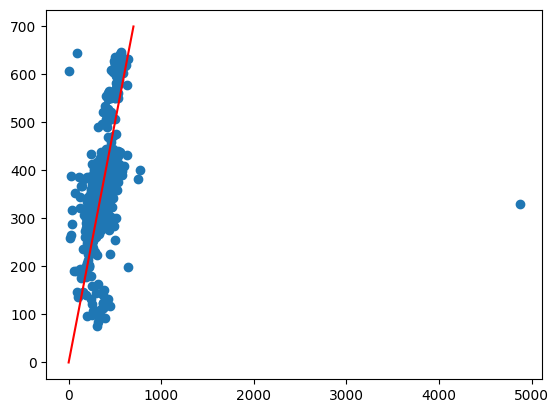

In [60]:
"""
1. Создаем точечную диаграмму для визуализации взаимосвязи между фактическими значениями (`y_test`) и прогнозируемыми значениями (`y_pred`).
2. Добавляем красную линию для представления идеального соответствия между фактическими и прогнозируемыми значениями, где значения x и y находятся в диапазоне [0, 700].

Код использует функцию `scatter` из модуля `matplotlib.pyplot` для создания точечной диаграммы с `y_test` в качестве значений x и `y_pred` в качестве значений y. Затем он добавляет красную линию к графику, используя функцию `plot`, где линия представляет идеальное соответствие между фактическими и прогнозируемыми значениями.
"""


# Создаем график рассеяния для визуализации взаимосвязи между фактическими значениями (y_test) и прогнозируемыми значениями (y_pred)
plt.scatter(y_test, y_pred)

# Добавляем красную линию, представляющую идеальное совпадение между фактическими и прогнозируемыми значениями
plt.plot([0, 700], [0, 700], color='red')